In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
import seaborn as sns; sns.set_style("dark")

In [2]:
train = pd.read_csv("data/train_fe.csv")
val = pd.read_csv("data/val_fe.csv")
test = pd.read_csv("data/test_fe.csv")

In [3]:
columns_to_use = ['dependent_count_scaled',
 'education_level_college',
 'education_level_doctorate',
 'education_level_graduate',
 'education_level_high_school',
 'education_level_post_graduate',
 'education_level_uneducated',
 'education_level_unknown',
 'marital_status_divorced',
 'marital_status_married',
 'marital_status_single',
 'marital_status_unknown',
 'income_category_$120k_+',
 'income_category_$40k_$60k',
 'income_category_$60k_$80k',
 'income_category_$80k_$120k',
 'income_category_less_than_$40k',
 'income_category_unknown',
 'card_category_blue',
 'card_category_gold',
 'card_category_platinum',
 'card_category_silver',
 'months_on_book_scaled',
 'total_relationship_count_scaled',
 'marriage_education_single_graduate',
 'marriage_education_single_high_school',
 'marriage_education_single_post_graduate',
 'marriage_education_single_uneducated',
 'marriage_education_single_unknown',
 'marriage_education_unknown_college',
 'marriage_education_unknown_doctorate',
 'marriage_education_unknown_graduate',
 'marriage_education_unknown_high_school',
 'marriage_education_unknown_post_graduate',
 'marriage_education_unknown_uneducated',
 'marriage_education_unknown_unknown', 'attrition_flag']

In [4]:
train = train[columns_to_use]
val = val[columns_to_use]
test = test[columns_to_use]

In [5]:
x_train, y_train = train.drop('attrition_flag', axis = 1), train["attrition_flag"]

In [6]:
x_val, y_val = val.drop('attrition_flag', axis = 1), val["attrition_flag"]

In [7]:
x_test, y_test = test.drop('attrition_flag', axis = 1), test["attrition_flag"]

### Model Fitting

In [8]:
nb = GaussianNB()

In [9]:
model = nb.fit(x_train, y_train)

In [10]:
pred_train = model.predict(x_train)
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      5439
           1       0.23      0.16      0.19      1041

    accuracy                           0.78      6480
   macro avg       0.54      0.53      0.53      6480
weighted avg       0.75      0.78      0.76      6480



<AxesSubplot:>

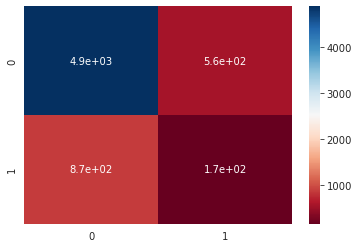

In [11]:
conf = confusion_matrix(y_train, pred_train)
sns.heatmap(conf, annot = True, cmap = "RdBu")

In [12]:
pred_val = model.predict(x_val)
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1360
           1       0.18      0.13      0.15       261

    accuracy                           0.76      1621
   macro avg       0.51      0.51      0.51      1621
weighted avg       0.74      0.76      0.75      1621



<AxesSubplot:>

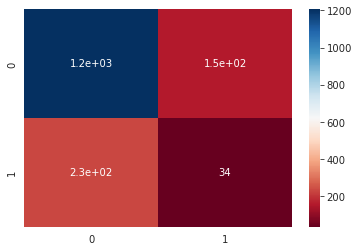

In [13]:
conf = confusion_matrix(y_val, pred_val)
sns.heatmap(conf, annot = True, cmap = "RdBu")

In [14]:
pred_test = model.predict(x_test)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1701
           1       0.22      0.14      0.17       325

    accuracy                           0.78      2026
   macro avg       0.53      0.52      0.52      2026
weighted avg       0.75      0.78      0.76      2026



<AxesSubplot:>

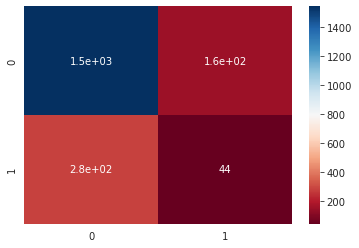

In [15]:
conf = confusion_matrix(y_test, pred_test)
sns.heatmap(conf, annot = True, cmap = "RdBu")